In [259]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [260]:
data = pd.read_csv("Data-Collisions.csv")
data = data.drop(["LONGITUDE","LATITUDE"],axis=1) 
data.head()

,SEVERITYCODE,WEEKEND,WEATHER,ROADCOND,LIGHTCOND,HOD
0,1,0,Overcast,Wet,Daylight,13:00
1,0,0,Raining,Wet,Dark - Street Lights On,18:00
2,0,0,Overcast,Dry,Daylight,11:00
3,0,0,Clear,Dry,Daylight,9:00
4,1,0,Raining,Wet,Daylight,8:00


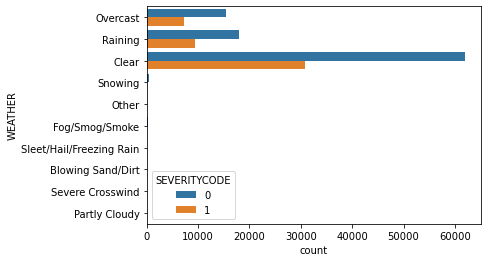

In [261]:
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=data)
plt.show()

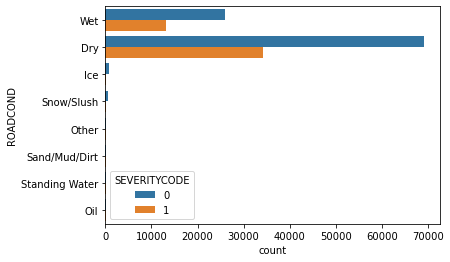

In [262]:
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=data)
plt.show()

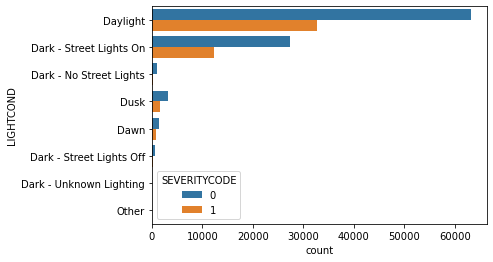

In [263]:
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=data)
plt.show()

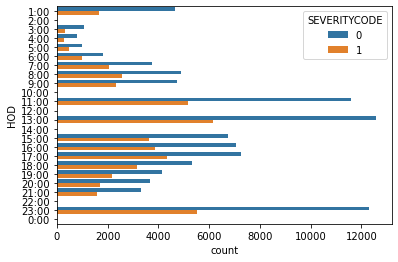

In [264]:
sns.countplot(y="HOD", hue="SEVERITYCODE", order=['1:00','2:00','3:00','4:00','5:00','6:00','7:00','8:00', '9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00', '17:00','18:00','19:00','20:00','21:00','22:00','23:00','0:00'], data=data)
plt.show()

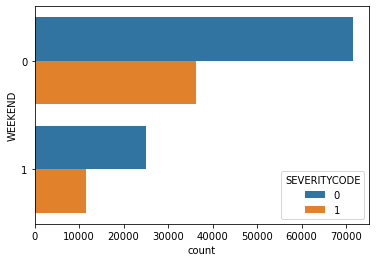

In [265]:
sns.countplot(y="WEEKEND", hue="SEVERITYCODE", data=data)
plt.show()

In [266]:
data['SEVERITYCODE'].value_counts()

0    96589
1    47891
Name: SEVERITYCODE, dtype: int64

In [267]:
data_severity_1 = data[data.SEVERITYCODE==0] # SEVERITYCODE 0 = ORIGINAL SEVERITYCODE 1 = Property collisions
data_severity_2 = data[data.SEVERITYCODE==1] # SEVERITYCODE 1 = ORIGINAL SEVERITYCODE 2 = Injury collisions

In [268]:
data_severity_2_upsampled = resample(data_severity_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=96589,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled severitycode 2 minority class
data_upsampled = pd.concat([data_severity_1, data_severity_2_upsampled])
 
# Display new class counts
data_upsampled.SEVERITYCODE.value_counts()

1    96589
0    96589
Name: SEVERITYCODE, dtype: int64

In [269]:
data_upsampled.head()

,SEVERITYCODE,WEEKEND,WEATHER,ROADCOND,LIGHTCOND,HOD
1,0,0,Raining,Wet,Dark - Street Lights On,18:00
2,0,0,Overcast,Dry,Daylight,11:00
3,0,0,Clear,Dry,Daylight,9:00
5,0,1,Clear,Dry,Daylight,17:00
7,0,0,Clear,Dry,Daylight,23:00


In [270]:
data_upsampled.dtypes

SEVERITYCODE     int64
WEEKEND          int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
HOD             object
dtype: object

In [271]:
data_final = pd.get_dummies(data_upsampled, columns=['WEATHER','ROADCOND','LIGHTCOND','HOD'])

In [272]:
training_dataset, test_dataset = model_selection.train_test_split(data_final, train_size=0.8, test_size=0.2)

In [273]:
training_dataset.SEVERITYCODE.value_counts()

1    77320
0    77222
Name: SEVERITYCODE, dtype: int64

In [274]:
test_dataset.SEVERITYCODE.value_counts()

0    19367
1    19269
Name: SEVERITYCODE, dtype: int64

In [275]:
training_dataset.dtypes

SEVERITYCODE                          int64
WEEKEND                               int64
WEATHER_Blowing Sand/Dirt             uint8
WEATHER_Clear                         uint8
WEATHER_Fog/Smog/Smoke                uint8
WEATHER_Other                         uint8
WEATHER_Overcast                      uint8
WEATHER_Partly Cloudy                 uint8
WEATHER_Raining                       uint8
WEATHER_Severe Crosswind              uint8
WEATHER_Sleet/Hail/Freezing Rain      uint8
WEATHER_Snowing                       uint8
ROADCOND_Dry                          uint8
ROADCOND_Ice                          uint8
ROADCOND_Oil                          uint8
ROADCOND_Other                        uint8
ROADCOND_Sand/Mud/Dirt                uint8
ROADCOND_Snow/Slush                   uint8
ROADCOND_Standing Water               uint8
ROADCOND_Wet                          uint8
LIGHTCOND_Dark - No Street Lights     uint8
LIGHTCOND_Dark - Street Lights Off    uint8
LIGHTCOND_Dark - Street Lights O

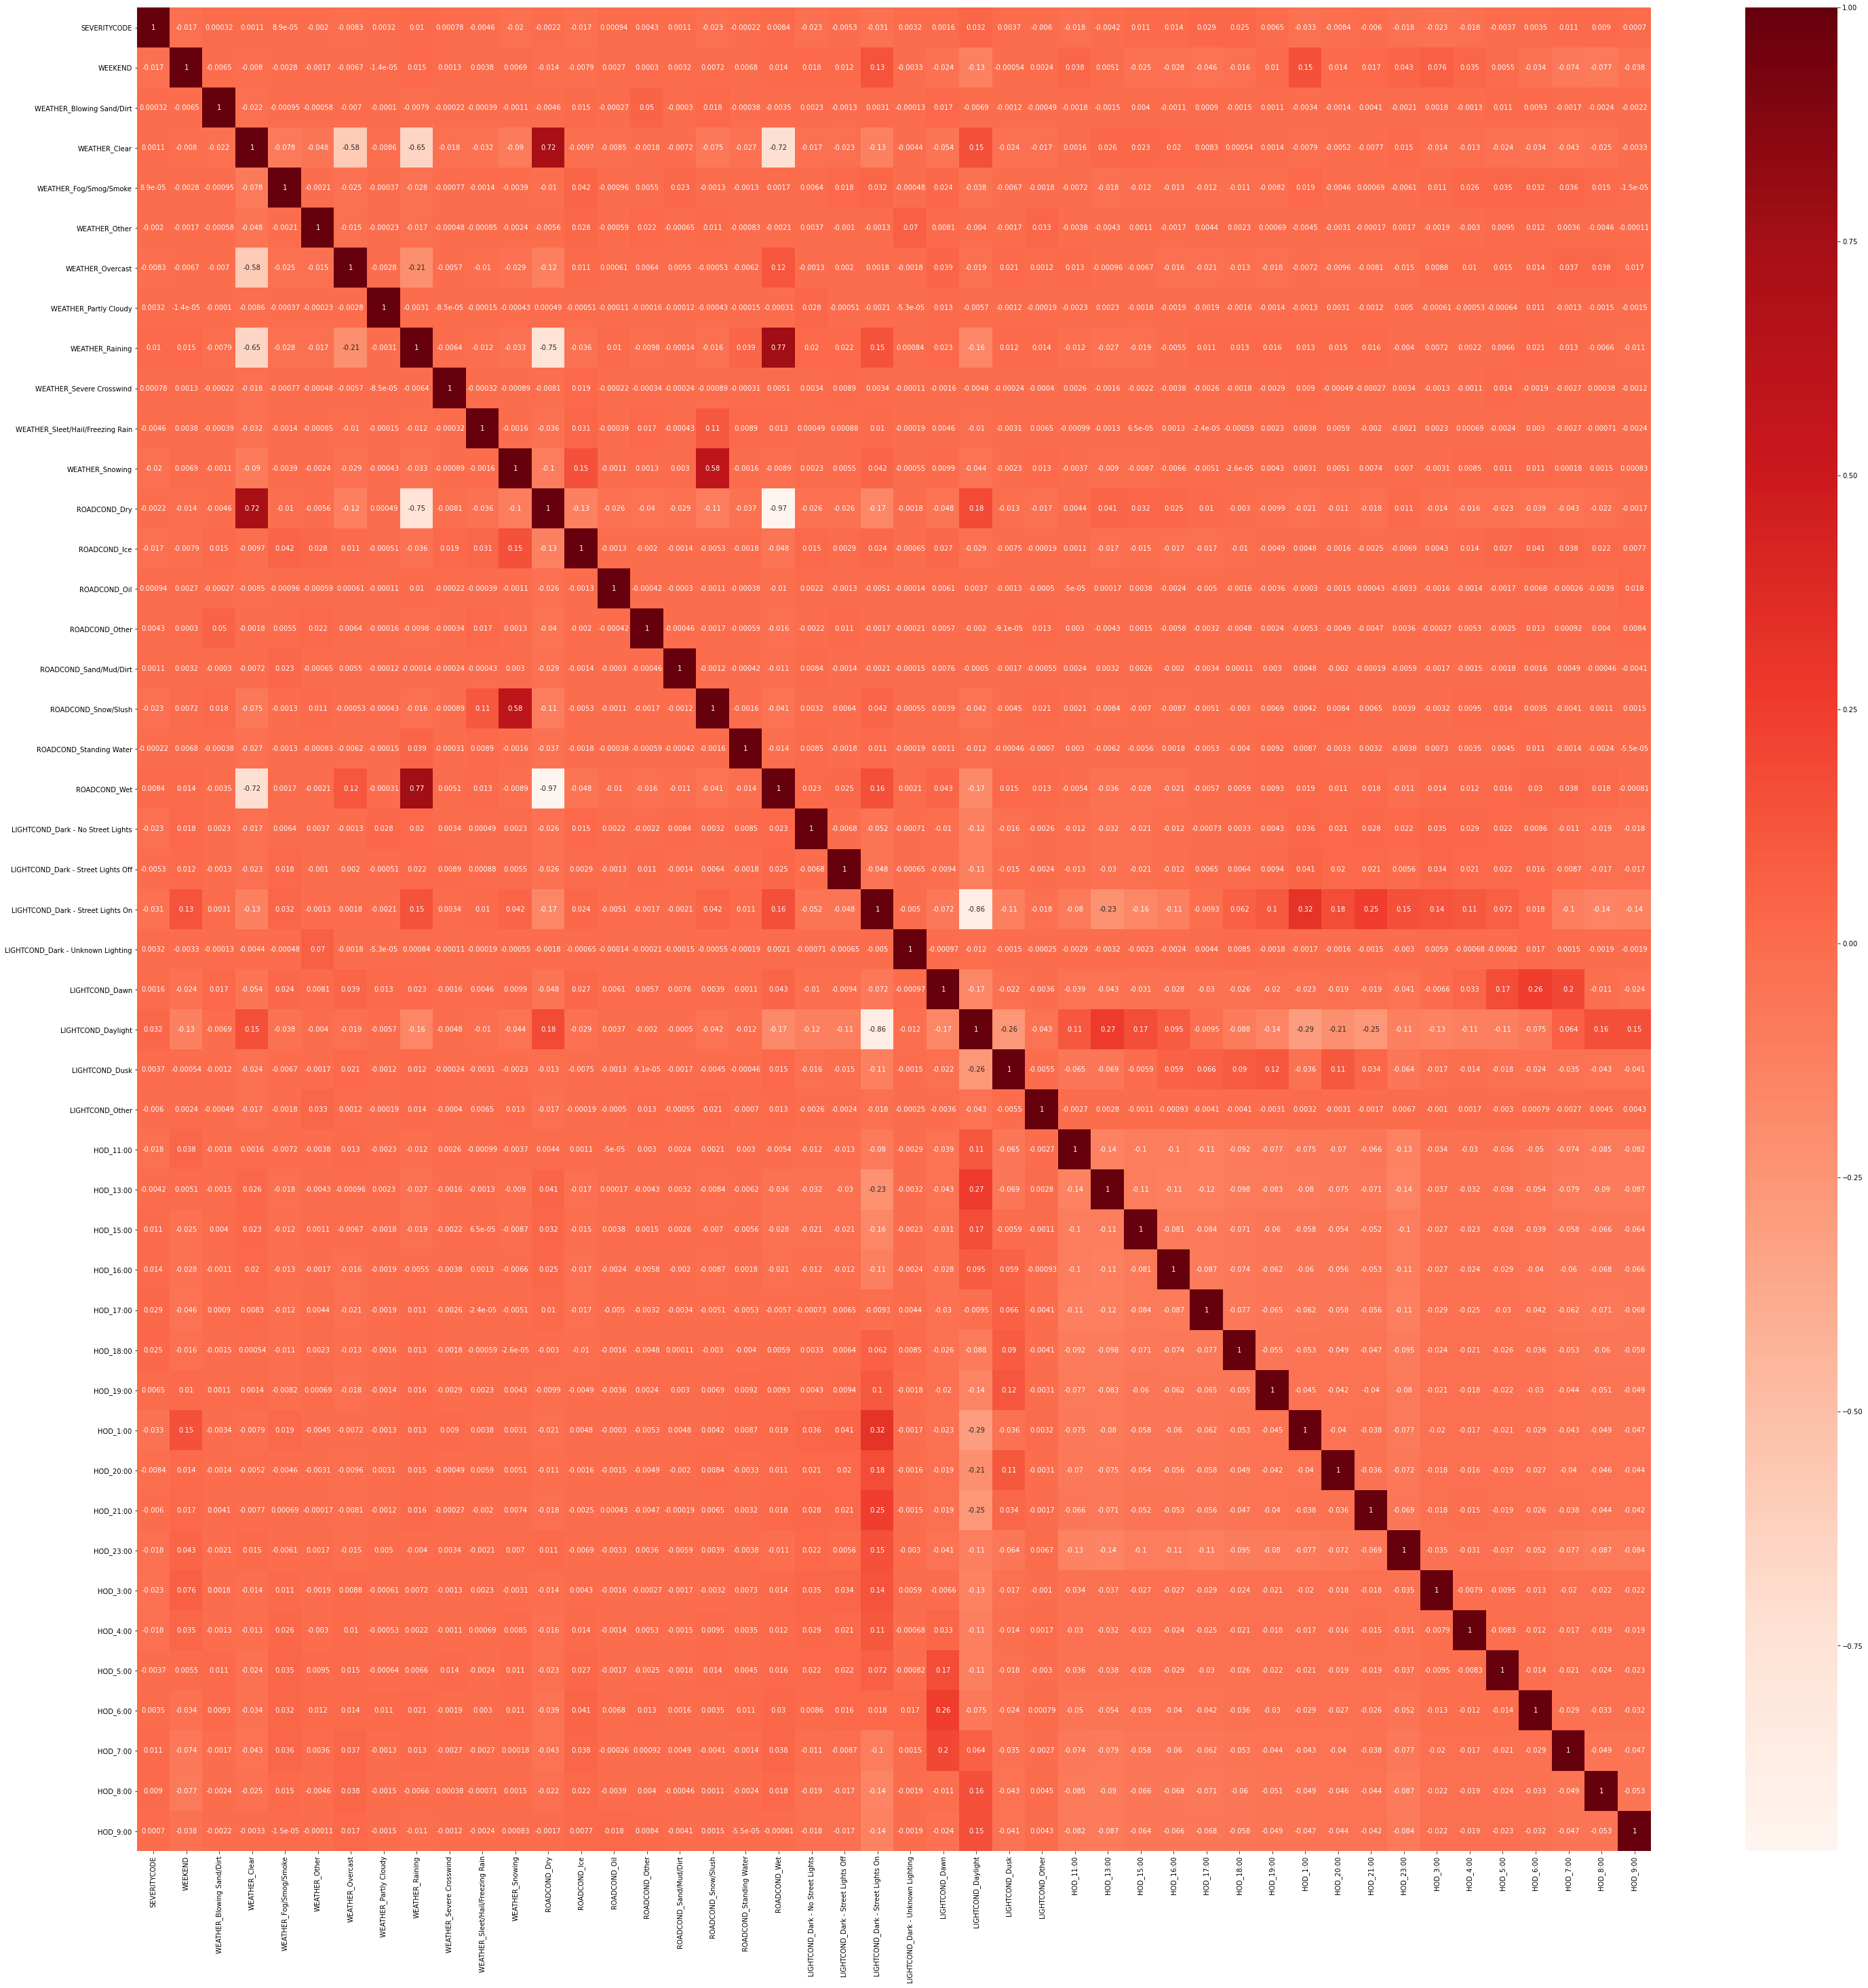

In [276]:
X =data_final.loc[:, data_final.columns != 'SEVERITYCODE']
y =data_final.loc[:, data_final.columns == 'SEVERITYCODE']

In [278]:
model = LinearRegression()
logreg = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 15)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\VSU\Miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\VSU\Miniconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VSU\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONV

[False False False False False False  True False  True  True  True False
  True False  True False  True False False  True False False  True False
 False False  True False False False False  True  True False  True False
 False False  True  True False False False False False]
[25 20 14 24 10 13  1 16  1  1  1 30  1  9  1  8  1 17 18  1 22 28  1 15
 11 27  1 12 21  5  3  1  1  7  1 29 23 19  1  1 26  6  2  4 31]


In [161]:
X_train=training_dataset.loc[:, data_final.columns != 'SEVERITYCODE']
y_train=training_dataset.loc[:, data_final.columns == 'SEVERITYCODE']
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [163]:
X_test=test_dataset.loc[:, data_final.columns != 'SEVERITYCODE']
y_test=test_dataset.loc[:, data_final.columns == 'SEVERITYCODE']

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 9888  9359]
 [ 8896 10493]]


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52     19247
           1       0.53      0.54      0.53     19389

    accuracy                           0.53     38636
   macro avg       0.53      0.53      0.53     38636
weighted avg       0.53      0.53      0.53     38636

